In [7]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

# for Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv("C:\\Users\\ishap\\Desktop\\training_set.csv")

In [9]:
data.head(6)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0
5,32.8,11.2,3.94,11.0,324,28.4,34.1,83.2,89,F,0


In [10]:
data['SOURCE'] = data.SOURCE.replace({"in":1, 'out':0})


# get all the features
features = [feat for feat in data.columns if feat !='SOURCE']

X = data[features] # feature set
y = data['SOURCE'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
X_train.shape, X_test.shape

((2647, 10), (662, 10))

In [11]:
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns")

num_features = [feat for feat in features if data[feat].dtype != object]
cat_features = [feat for feat in features if data[feat].dtype == object]

print(f"Total number of features : {len(features)}")
print(f"Number of numerical features : {len(num_features)}")
print(f"Number of categorical features : {len(cat_features)}\n")

The dataset contains 3309 rows and 11 columns
Total number of features : 10
Number of numerical features : 9
Number of categorical features : 1



In [12]:
data.isna().mean().to_frame(name='Missing %')

,Missing %
HAEMATOCRIT,0.0
HAEMOGLOBINS,0.0
ERYTHROCYTE,0.0
LEUCOCYTE,0.0
THROMBOCYTE,0.0
MCH,0.0
MCHC,0.0
MCV,0.0
AGE,0.0
SEX,0.0


In [13]:
# To count number unique values in each feature
data.nunique().to_frame(name='# of unique values')

,# of unique values
HAEMATOCRIT,314
HAEMOGLOBINS,128
ERYTHROCYTE,406
LEUCOCYTE,255
THROMBOCYTE,525
MCH,177
MCHC,101
MCV,390
AGE,95
SEX,2


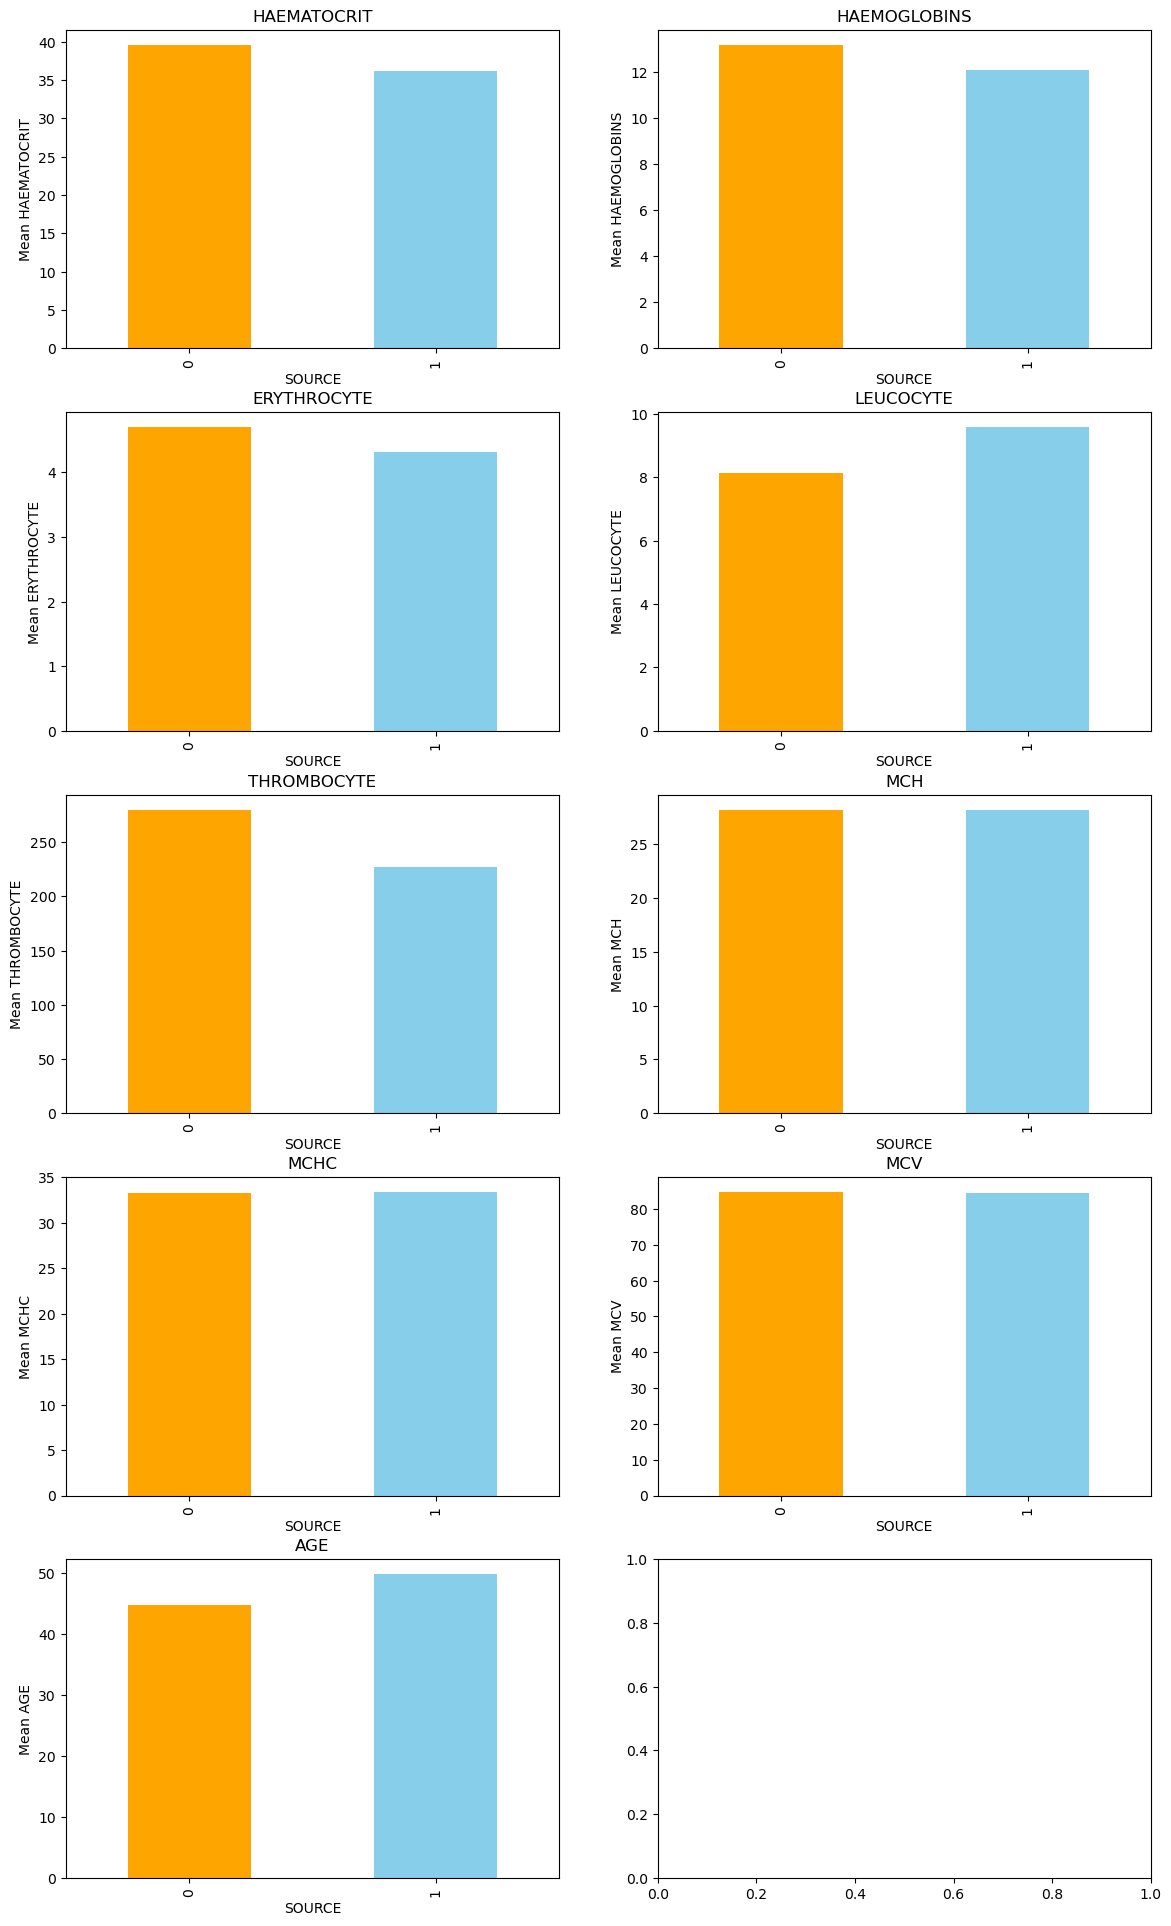

In [14]:
# Relationship between target and mean of each numerical features
fig, axes = plt.subplots(5,2, figsize=(14,24))
axes = [ax for axes_row in axes for ax in axes_row]
for i,c in enumerate(data[num_features]):
    df = data.groupby("SOURCE")[c].mean()
    plot = df.plot(kind='bar', title=c, ax=axes[i], ylabel=f'Mean {c}', color=('orange','skyblue'))

In [15]:
X_train.SEX.replace({'F':0, 'M':1}, inplace=True)
X_test.SEX.replace({'F':0, 'M':1}, inplace=True)

In [16]:
Total_features=features
Total_features.append('SOURCE')
Total_features

['HAEMATOCRIT',
 'HAEMOGLOBINS',
 'ERYTHROCYTE',
 'LEUCOCYTE',
 'THROMBOCYTE',
 'MCH',
 'MCHC',
 'MCV',
 'AGE',
 'SEX',
 'SOURCE']

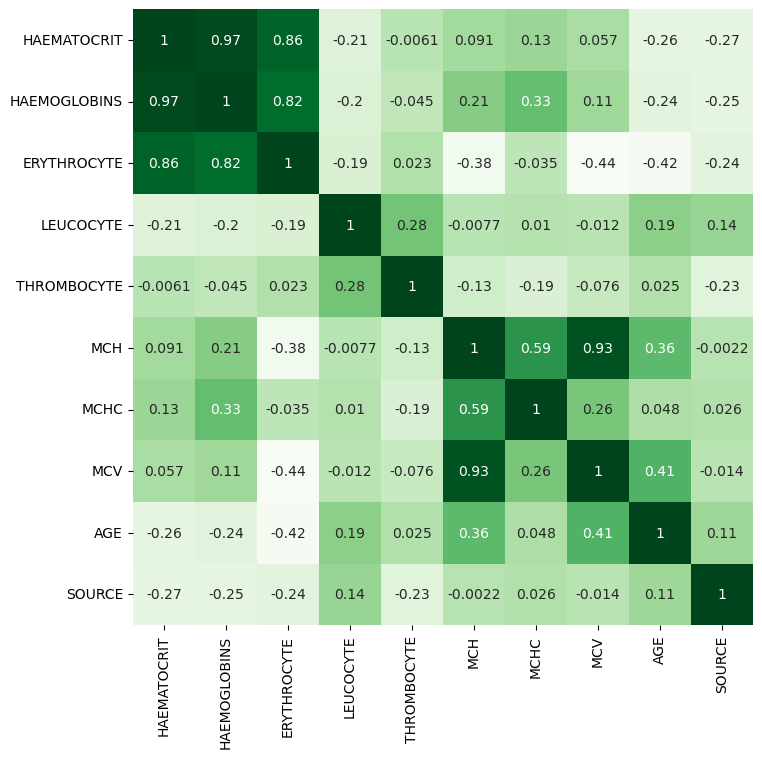

In [17]:
# Pearson Correlation of features w.r.t each other
import seaborn as sns
corr_matt = data[Total_features].corr(method='pearson')
plt.figure(figsize=(8,8))
corr = sns.heatmap(corr_matt, annot=True, cmap='Greens', cbar=False)

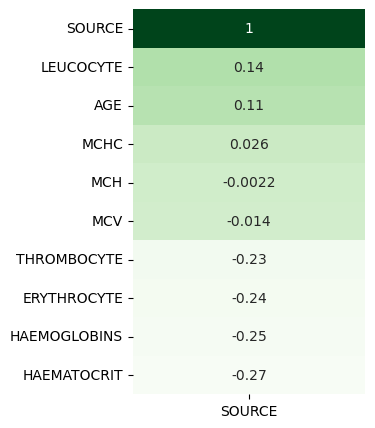

In [18]:
# Pearson's Correlation of features w.r.t target

corr_matt = data.corr(method='pearson')[['SOURCE']].sort_values(by='SOURCE',ascending=False)
plt.figure(figsize=(3,5))
corr = sns.heatmap(corr_matt, annot=True, cmap='Greens', cbar=False)

In [19]:
# Remove least correlated features [MCH, MCHC, MCV]

X_train.drop(['MCH', 'MCHC','MCV'], axis=1, inplace=True)
X_test.drop(['MCH', 'MCHC','MCV'], axis=1, inplace=True)

# final train set
X_train.head(3)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,AGE,SEX
2418,35.8,11.8,4.21,10.7,250,65,0
2523,39.4,13.1,4.56,8.7,366,58,0
1561,42.3,13.8,5.50,12.3,341,25,0


In [20]:
from sklearn.impute import SimpleImputer

# Create an imputer with a strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform your test data using the same imputer
X_test_imputed = imputer.transform(X_test)

In [21]:
# Check for missing values in the imputed data
print("Missing values in X_train_imputed:", np.isnan(X_train_imputed).sum())
print("Missing values in X_test_imputed:", np.isnan(X_test_imputed).sum())

Missing values in X_train_imputed: 0
Missing values in X_test_imputed: 0


In [22]:
log_reg = LogisticRegression(random_state=1)

log_reg.fit(X_train_imputed, y_train)

print("Train accuracy : ", accuracy_score(y_train, log_reg.predict(X_train_imputed)))
print("Test accuracy : ", accuracy_score(y_test, log_reg.predict(X_test_imputed)))


Train accuracy :  0.7170381564034757
Test accuracy :  0.7175226586102719


In [23]:
#classification Report
print(classification_report(y_test, log_reg.predict(X_test_imputed)))
print(accuracy_score(y_test,log_reg.predict(X_test_imputed)))

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test_imputed))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       399
           1       0.72      0.48      0.57       263

    accuracy                           0.72       662
   macro avg       0.72      0.68      0.68       662
weighted avg       0.72      0.72      0.70       662

0.7175226586102719


ROC_AUC_SCORE is 0.7601894470015342


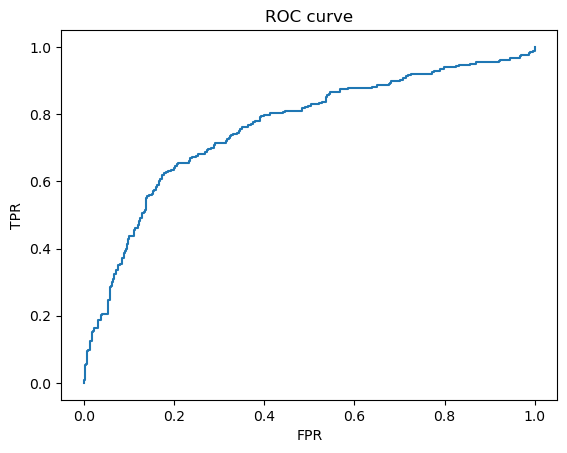

In [24]:
# getting the auc roc curve
y_prob = log_reg.predict_proba(X_test_imputed)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print('ROC_AUC_SCORE is',auc)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [25]:
tree = DecisionTreeClassifier(random_state=1)

tree.fit(X_train_imputed, y_train)

print("Train accuracy : ", accuracy_score(y_train, tree.predict(X_train_imputed)))
print("Test accuracy : ", accuracy_score(y_test, tree.predict(X_test_imputed)))


Train accuracy :  1.0
Test accuracy :  0.6616314199395771


In [26]:
#classification report and accuracy
print(classification_report(y_test, tree.predict(X_test_imputed)))
print(accuracy_score(y_test,tree.predict(X_test_imputed)))
tree_acc = accuracy_score(y_test,tree.predict(X_test_imputed))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72       399
           1       0.57      0.59      0.58       263

    accuracy                           0.66       662
   macro avg       0.65      0.65      0.65       662
weighted avg       0.66      0.66      0.66       662

0.6616314199395771


ROC_AUC_SCORE is 0.6499614054146774


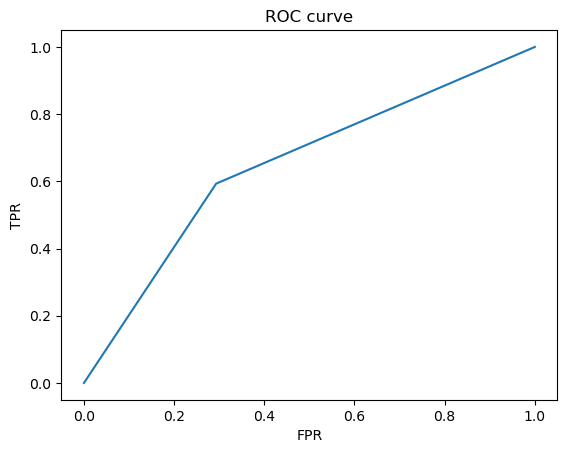

In [27]:
# getting the auc roc curve
y_prob = tree.predict_proba(X_test_imputed)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print('ROC_AUC_SCORE is',auc)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [28]:
forest = RandomForestClassifier(random_state = 1, n_estimators = 10)

forest.fit(X_train_imputed, y_train)

print("Train accuracy : ", accuracy_score(y_train, forest.predict(X_train_imputed)))
print("Test accuracy : ", accuracy_score(y_test, forest.predict(X_test_imputed)))

Train accuracy :  0.9811106913486967
Test accuracy :  0.7447129909365559


In [29]:
#Classification report
print(classification_report(y_test, forest.predict(X_test_imputed)))
print(accuracy_score(y_test,forest.predict(X_test_imputed)))
forest_acc = accuracy_score(y_test,forest.predict(X_test_imputed))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       399
           1       0.72      0.58      0.64       263

    accuracy                           0.74       662
   macro avg       0.74      0.72      0.72       662
weighted avg       0.74      0.74      0.74       662

0.7447129909365559


ROC_AUC_SCORE is 0.7728875420490389


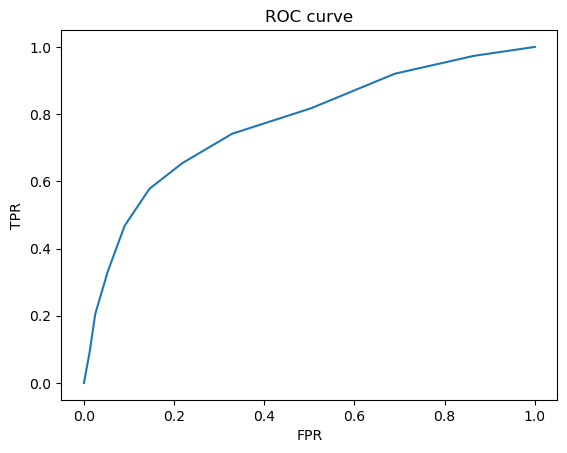

In [30]:
# getting the auc roc curve
y_prob = forest.predict_proba(X_test_imputed)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print('ROC_AUC_SCORE is',auc)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [31]:
# Check for NaN values in X_train and X_test
print("NaN values in X_train:")
print(X_train.isna().sum())

print("\nNaN values in X_test:")
print(X_test.isna().sum())

NaN values in X_train:
HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
AGE             0
SEX             0
dtype: int64

NaN values in X_test:
HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
AGE             0
SEX             0
dtype: int64


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
# Impute missing values in 'SEX' with the mode for both training and testing sets
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Your original features and data splitting
features = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE','THROMBOCYTE', 'AGE', 'SEX','SOURCE']
num_features = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE','THROMBOCYTE', 'AGE','SOURCE']

X = data[features]  # feature set
y = data['SOURCE']   # target

# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Impute missing values with mean for both training and testing sets
imputer = SimpleImputer(strategy='mean')
X_train[num_features] = imputer.fit_transform(X_train[num_features])
X_test[num_features] = imputer.transform(X_test[num_features])

# Label encoding
X_train['SEX'].replace({'M': 1, 'F': 0}, inplace=True)
X_test['SEX'].replace({'M': 1, 'F': 0}, inplace=True)

# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

# Initialize and train the RandomForestClassifier
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train_imputed, y_train)

# Print relevant information
print("Final model trained successfully!")
print("Training data:")
print(X_train.head())
print("Testing data:")
print(X_test.head())


Final model trained successfully!
Training data:
      HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
2418     0.399638      0.529801     0.443902   0.172662     0.216022   
2523     0.464738      0.615894     0.500813   0.136691     0.320432   
1561     0.517179      0.662252     0.653659   0.201439     0.297930   
80       0.311031      0.430464     0.326829   0.170863     0.275428   
3278     0.336347      0.543046     0.408130   0.275180     0.369937   

           AGE  SEX  SOURCE  
2418  0.653061    0     0.0  
2523  0.581633    0     0.0  
1561  0.244898    0     0.0  
80    0.255102    0     0.0  
3278  0.867347    0     0.0  
Testing data:
      HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  \
2990     0.627486      0.854305     0.780488   0.068345     0.131413   
789      0.459313      0.615894     0.487805   0.080935     0.198020   
1846     0.207957      0.317881     0.206504   0.118705     0.172817   
2329     0.553345      0.701987     

In [37]:
cols=[ 'HAEMATOCRIT',  'HAEMOGLOBINS',  'ERYTHROCYTE',  'LEUCOCYTE',  'THROMBOCYTE','AGE','SEX']
test_case = pd.DataFrame(columns=cols)
test_case=test_case.append({ 'HAEMATOCRIT':33.8,  'HAEMOGLOBINS':11.1,  'ERYTHROCYTE':4.18,  'LEUCOCYTE':4.6,  'THROMBOCYTE':150,'AGE':33,'SEX':0},ignore_index=True)
print("Input: ")
print(test_case)
test_case[num_features]=scaler.transform(test_case[num_features])
prediction1 = forest.predict(test_case)
print("Output: ")
if prediction1 == [0]:
  print("out")
else:
  print("in")

Input: 
   HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   AGE  SEX
0         33.8          11.1         4.18        4.6        150.0  33.0  0.0


KeyError: "['SOURCE'] not in index"

In [36]:

y_pred=forest.predict(X_test_imputed)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       399
           1       1.00      1.00      1.00       263

    accuracy                           1.00       662
   macro avg       1.00      1.00      1.00       662
weighted avg       1.00      1.00      1.00       662

1.0


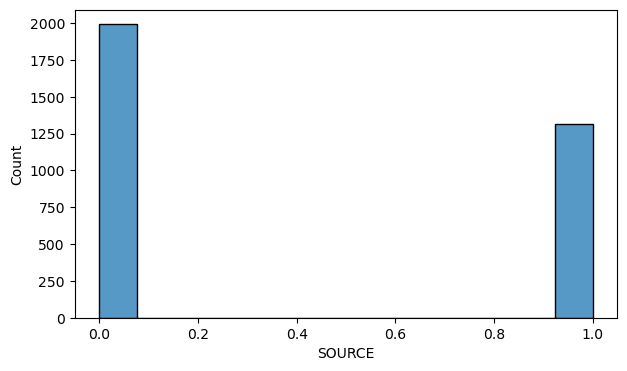

In [38]:
plt.figure(figsize=(7,4))
fig = sns.histplot(x='SOURCE', data=data)

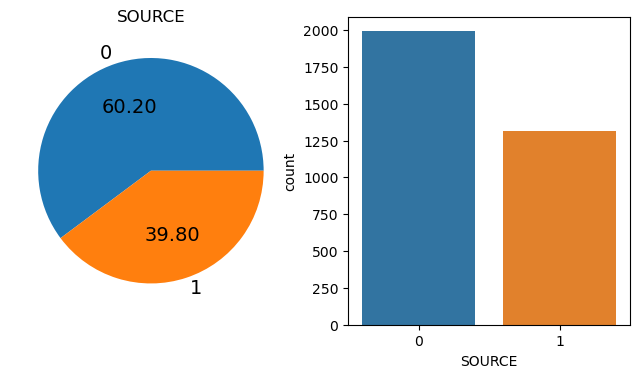

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
df = data['SOURCE'].value_counts()
barplot = df.plot(kind='pie', ax=axes[0], title='SOURCE', autopct="%.2f", fontsize=14, ylabel='')
countplot = sns.countplot(x='SOURCE', data=data, ax=axes[1])

In [40]:
test_data = pd.read_csv("C:\\Users\\ishap\\Desktop\\training_set.csv")

In [41]:
test_data.drop(['MCH','MCHC', 'MCV'], axis=1, inplace=True)

In [43]:
test_data.SEX.replace({'F':0, 'M':1}, inplace=True)
test_data[num_features] = scaler.transform(test_data[num_features])
prediction = forest.predict(test_data)


In [44]:
y1_pred = forest.predict(test_data)
print(y1_pred)

[1 0 0 ... 0 0 1]


In [45]:
print(accuracy_score(y_test,y_pred))


1.0


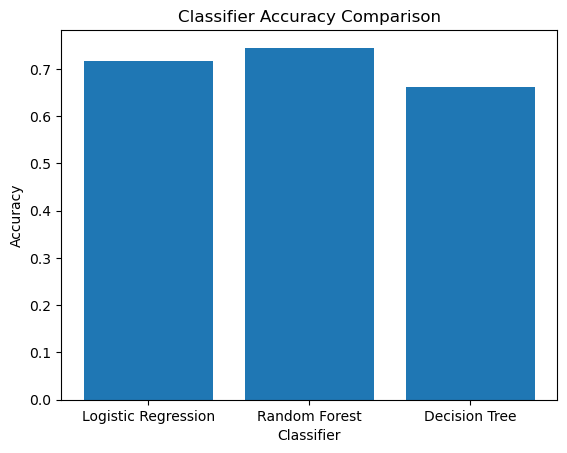


Random Forest accuracy: 0.7447129909365559
Logistic Regression accuracy: 0.7175226586102719
Decision Tree accuracy: 0.6616314199395771


In [46]:

plt.bar(['Logistic Regression', 'Random Forest', 'Decision Tree'], [log_reg_acc, forest_acc, tree_acc])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.show()

print("\nRandom Forest accuracy:", forest_acc)
print("Logistic Regression accuracy:", log_reg_acc)
print("Decision Tree accuracy:", tree_acc)